In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('flipkart_product.csv', encoding = 'latin')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [ ]:
dataset.isnull().any()

ProductName    False
Price           True
Rate            True
Review          True
Summary         True
dtype: bool

In [ ]:
dataset.shape

(189874, 5)

In [ ]:
dataset['Price']= dataset['Price'].str.replace('\x83', '')
dataset['Price']= dataset['Price'].str.replace('?', '')
dataset['Price']= dataset['Price'].str.replace('â\x82¹', '')
dataset['Price']= dataset['Price'].str.replace(',', '')
dataset['Price']= dataset['Price'].str.replace('â¹', '')

<ipython-input-40-12060bd9b7c3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Price']= dataset['Price'].str.replace('?', '')


In [ ]:
set(dataset['Price'])

{'10000',
 '10790',
 '10890',
 '109',
 '1095',
 '1097',
 '1099',
 '1119',
 '113',
 '1142',
 '1149',
 '11500',
 '1155',
 '11595',
 '118',
 '1199',
 '11999',
 '1220',
 '1233',
 '124',
 '1249',
 '125',
 '1256',
 '1259',
 '1260',
 '127',
 '1278',
 '129',
 '1290',
 '1298',
 '1299',
 '12990',
 '12999',
 '130',
 '13049',
 '1329',
 '1349',
 '136',
 '13703',
 '1383',
 '1399',
 '13999',
 '140',
 '1401',
 '14146',
 '14190',
 '142',
 '14299',
 '1448',
 '1449',
 '145',
 '1453',
 '1469',
 '1471',
 '14790',
 '149',
 '1499',
 '152',
 '1529',
 '154',
 '1547',
 '1549',
 '15490',
 '155',
 '1550',
 '156',
 '1565',
 '158',
 '159',
 '1599',
 '15999',
 '160',
 '1614',
 '163',
 '1639',
 '16490',
 '16499',
 '165',
 '166',
 '168',
 '169',
 '1699',
 '16990',
 '1709',
 '171',
 '1719',
 '1727',
 '173',
 '1747',
 '175',
 '176',
 '178',
 '1782',
 '179',
 '1799',
 '180',
 '1804',
 '1819',
 '1839',
 '184',
 '189',
 '1898',
 '1899',
 '18990',
 '190',
 '193',
 '194',
 '195',
 '199',
 '1999',
 '203',
 '204',
 '205',
 '20

In [ ]:
data = pd.DataFrame(dataset)

In [ ]:
result1 = data.loc[data["Price"] == "Bajaj DX 2 L/W Dry Iron"].index
result2 =  data.loc[data["Price"] == "Nova Plus Amaze NI 10 1100 W Dry Ironÿÿ(Grey & Turquoise)"].index
result3 = data.loc[data["Price"] == "Pigeon Favourite Electric Kettleÿÿ(1.5 L Silver Black)"].index
result4 = data.loc[data["Rate"] == 's'].index
data.drop([result1[0],result2[0],result3[0],result4[0]],axis=0,inplace=True)


In [ ]:
count = pd.DataFrame(data['Rate'].value_counts())
count = count.reset_index()
count.rename(columns = {'index':'Rate', 'Rate':'RatingCount'}, inplace = True)

In [ ]:
count

,Rate,RatingCount
0,5,108694
1,4,39653
2,1,19607
3,3,15681
4,2,6234


In [ ]:
pd.DataFrame(data["Rate"])

,Rate
0,5
1,5
2,3
3,1
4,3
...,...
189869,5
189870,5
189871,5
189872,4


In [ ]:
data = data[data['Price'].notna()]
data["Rate"] = data["Rate"].apply(np.int64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189869 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189869 non-null  object
 1   Price        189869 non-null  object
 2   Rate         189869 non-null  int64 
 3   Review       189866 non-null  object
 4   Summary      189856 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [ ]:
data[data['Rate'] == 3].index

Int64Index([     2,      4,      7,     43,     45,     53,     64,     88,
               120,    140,
            ...
            189768, 189769, 189771, 189772, 189773, 189797, 189823, 189824,
            189830, 189843],
           dtype='int64', length=15681)

In [ ]:
data.drop(data[data['Rate'] == 3].index, inplace=True)
data.info()
#data['Rate'] == 3 | data['Rate'] == 4].index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174188 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  174188 non-null  object
 1   Price        174188 non-null  object
 2   Rate         174188 non-null  int64 
 3   Review       174185 non-null  object
 4   Summary      174176 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.0+ MB


In [ ]:
data.loc[data["Rate"] == 2,"Rate"] = 1
data.loc[data["Rate"] == 4,"Rate"] = 5

In [ ]:
data

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Awesome,Best budget 2 fit cooler. Nice cooling
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Useless product,Very bad product it's a only a fan
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Awesome,The cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Highly recommended,Very good product
...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,Good
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5,Just wow!,Super


In [ ]:
count = pd.DataFrame(data['Rate'].value_counts())
count = count.reset_index()
count.rename(columns = {'index':'Rate', 'Rate':'RatingCount'}, inplace = True)

In [ ]:
count

,Rate,RatingCount
0,5,148347
1,1,25841


In [ ]:
column_headers = list(data.columns)
column_headers

['ProductName', 'Price', 'Rate', 'Review', 'Summary']

In [ ]:
data["Price"] = data["Price"].apply(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174188 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  174188 non-null  object
 1   Price        174188 non-null  int64 
 2   Rate         174188 non-null  int64 
 3   Review       174185 non-null  object
 4   Summary      174176 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.0+ MB


In [ ]:
dataset = data
len(set(dataset["ProductName"]))

811

In [ ]:
dataset['ProductName'].value_counts()

MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel)                                                     8694
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe)    8118
Home Sizzler 153 cm (5.02 ft) Polyester Room Darkening Window Curtain (Pack Of 2)Â Â (Floral, Brown)                       4028
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard)                                                     2118
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))           2115
                                                                                                                           ... 
Unicrafts Shelf OrganizersÂ Â (Black, Cotton)                                                                                 7
SAMSUNG DW60M5042FW/TL Free Standing 13 Place Settings Dishwasher                                       

In [ ]:
count = pd.DataFrame(dataset['ProductName'].value_counts())
count = count.reset_index()
count.rename(columns = {'index':'ProductName', 'ProductName':'ReviewCount'}, inplace = True)

In [ ]:
count

,ProductName,ReviewCount
0,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,8694
1,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,8118
2,Home Sizzler 153 cm (5.02 ft) Polyester Room D...,4028
3,Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beig...,2118
4,CMerchants Multi Organiser BLue-4 Book Shelf M...,2115
...,...,...
806,"Unicrafts Shelf OrganizersÂ Â (Black, Cotton)",7
807,SAMSUNG DW60M5042FW/TL Free Standing 13 Place ...,7
808,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,7
809,Stylish Brown Sports Men Watches Multifunction...,5


In [ ]:
dataset.to_csv('Product_Result.csv')

In [ ]:
dataset["Price"] = dataset["Price"].apply(np.int64)

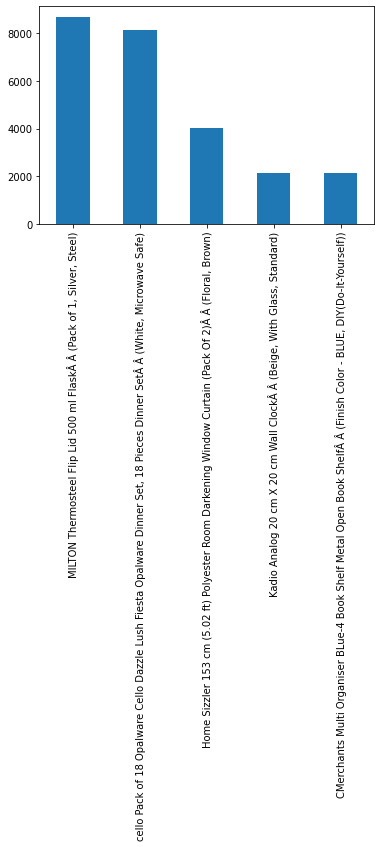

In [ ]:
dataset.ProductName.value_counts().nlargest(5).plot(kind='bar')